# Part I: Theory Questions

### k-Nearest Neighbor Classification

###  Brief overview of the problem

In the first part of this assignment, we are expected to solve some theoretical problems related to k-Nearest Neighbor Classification and Linear regression. Then for the second part, we should implement a nearest neighbor algorithm and also weighted KNN algorithm to detect Covid-19 disease from images. The goal of this assignment is to make us understand how kernel regression algorithm works.

### Question1

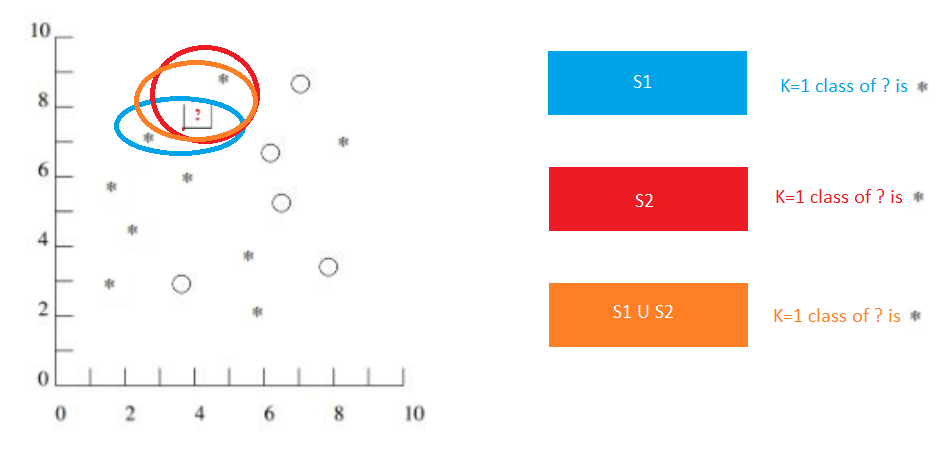

In [1]:
from IPython.display import Image
Image("KNN-1.png")

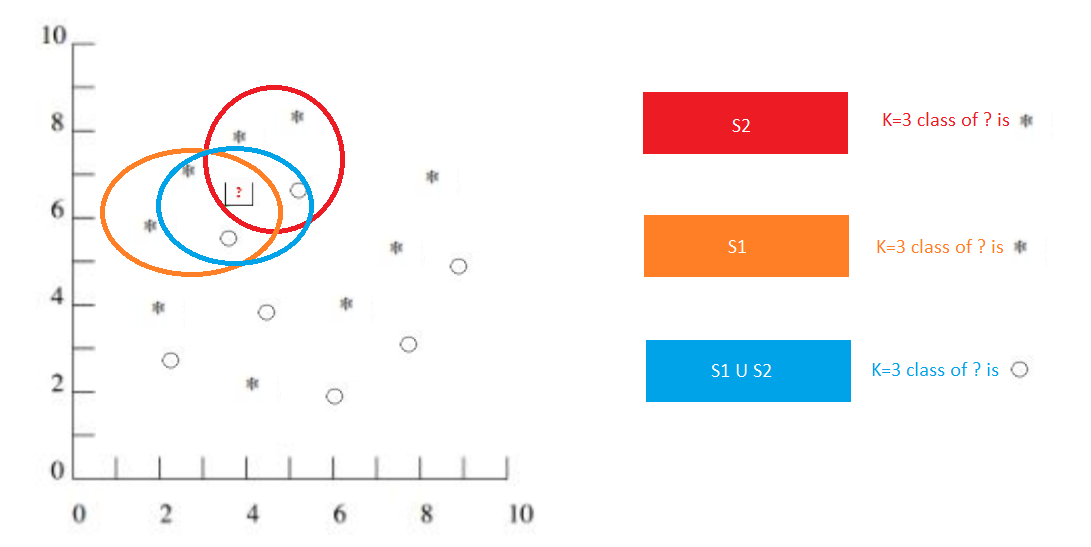

In [2]:
Image("KNN-3.png")

### Question 2

#### Answer of a:

If we note that a point can be its own neighbor. So, k = 1 minimizes the training set error. The error is 0.


#### Answer of b:

The values of k=5 or k=7 minimizes the leave-one-out cross-validation error for this data set. The resulting error is 4/14. Cross-validation allows us to compare different machine learning methods and get a sense of how well they will work in practice. If we use train/test/validation method for the small datasets, the percentages of them can causes some problems. The cross-validation method gives us an opportunity to obtain more effective solution. That method wastes less amount of data as compared to train/test/validation method.

#### Answer of c:

If we use too large values for k, it leads to misclassification for every data point using leave one out cross-validation. Too small values of k leads to overfitting.

#### Answer of d:

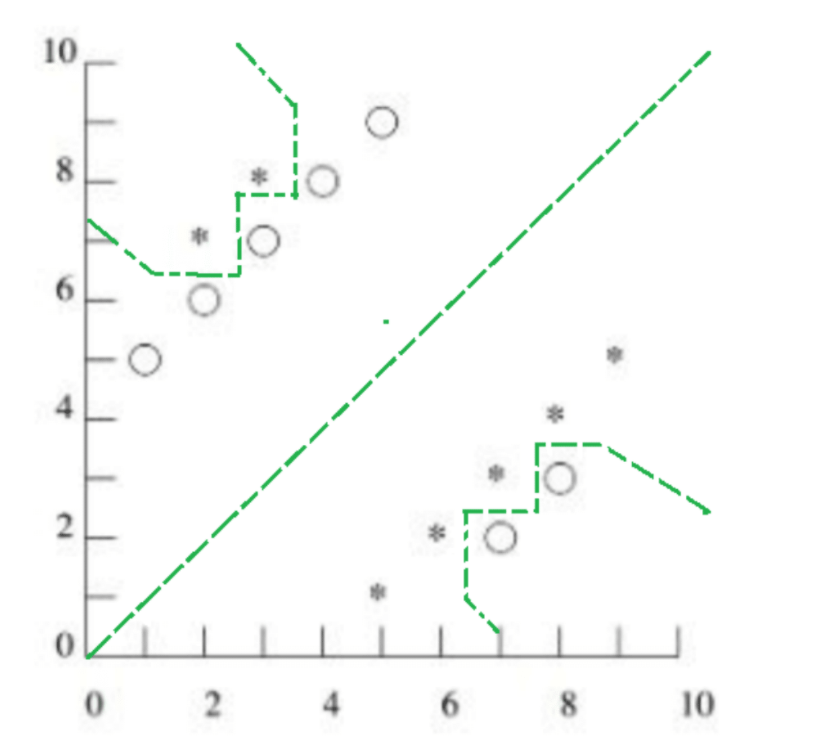

In [3]:
Image("boundary_new.png")

### Linear Regression

#### Answer of 1:

Dimension of X is (23,6)
Dimension of y is (23,1)
Dimension of θ is (6,1)

#### Answer of 2:

I prefer gradient descent because if we choose closed form solution, the matrices size would be very huge so it takes lots of time to make computations. $(X^{T}X)^{-1}$ will be very slow to compute. Inverting this large matrix is very expensive to make computation, so in this situation, gradient descent is much more better.

#### Answer of 3:

In future scaling, we get every future into approximately -1$\leq$$x_{i}$$\leq$1 range. It is one of the practical trick for making gradient descent work well and it is not necessary for the normal equation method. Because the analytical solution using normal equation doesn't suffer from any skewness in the contour plot of the cost function which affects the gradient descent. The cost function J(θ) for linear regression has no local optima. So, the valid reason is only (c). 

# PART II: Classification of Images

### Details of my implemented solution 

In this part, I first created my dataframe for each images by using gabor filter and the original pixel values. I used these values as my features because I got more accurate result by combining these features. I compared the performance of these features seperately. The detailed accuracy scores with these features are mentioned in the "Calculating Accurracy" section below.
After creating my dataframe, I splitted my training dataset into two set; training set which is used to learn model, and validation set which is used to measure the success of my model. After splitting operation, I normalize the values to between 0 and 1. Then I implemented my KNN classifier. While I was implementing it, I followed the conventions of the other Machine Learning libraries such as scikit-learn library. 

KNN algorithm does not involve a training step. So, in the fit function, I simply stored my training samples to use them later.
For the predict function, it can get multiple samples so I use a helper method for each samples. In this helper method, I used euclidean distance for two feature vectors. I calculated the distances between a new sample and all the training samples. Then I sorted the distances with np.argsot(). This sorts the distances and returns the indices of how it is sorted.  Then I get the labels of the nearest neighbors by using list comprehension. After that, I used the Counter module to get the most common class label. The related code for my KNN implementation is in the "KNN Implementation" section below.

### Gabor and Canny Edge Filters For Future Extraction

In [4]:
# %load "filters.py"
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Grayscale
def BGR2GRAY(img):
    # Grayscale
    gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
    return gray

# Canny Edge dedection
def Canny_edge(img):
   # Canny Edge
    canny_edges = cv2.Canny(np.uint8(img),100,200)
    return canny_edges


# Gabor Filter
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get half size
    d = K_size // 2

    # prepare kernel
    gabor = np.zeros((K_size, K_size), dtype=np.float32)

    # each value
    for y in range(K_size):
        for x in range(K_size):
            # distance from center
            px = x - d
            py = y - d

            # degree -> radian
            theta = angle / 180. * np.pi

            # get kernel x
            _x = np.cos(theta) * px + np.sin(theta) * py

            # get kernel y
            _y = -np.sin(theta) * px + np.cos(theta) * py

            # fill kernel
            gabor[y, x] = np.exp(-(_x ** 2 + Gamma ** 2 * _y ** 2) / (2 * Sigma ** 2)) * np.cos(
                2 * np.pi * _x / Lambda + Psi)

    # kernel normalization
    gabor /= np.sum(np.abs(gabor))

    return gabor


# Use Gabor filter to act on the image
def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get shape
    H, W = gray.shape

    # padding
    gray = np.pad(gray, (K_size // 2, K_size // 2), 'edge')

    # prepare out image
    out = np.zeros((H, W), dtype=np.float32)

    # get gabor filter
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)

    # filtering
    for y in range(H):
        for x in range(W):
            out[y, x] = np.sum(gray[y: y + K_size, x: x + K_size] * gabor)

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


# Use 6 Gabor filters with different angles to perform feature extraction on the image
def Gabor_process(img):
    # get shape
    H, W, _ = img.shape

    # gray scale
    gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    # As = [0, 45, 90, 135]
    As = [0, 30, 60, 90, 120, 150]

    # prepare pyplot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    out = np.zeros([H, W], dtype=np.float32)

    # each angle
    for i, A in enumerate(As):
        # gabor filtering
        _out = Gabor_filtering(gray, K_size=9, Sigma=1.5, Gamma=1.2, Lambda=1, angle=A)

        # add gabor filtered image
        out += _out

    # scale normalization
    out = out / out.max() * 255
    out = out.astype(np.uint8)

    return out

# canny edge process
#out = Canny_edge(img)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
%matplotlib inline

### Creating DataFrame

In [6]:
DATADIR = "train"
CATEGORIES = ["COVID" , "NORMAL", "Viral Pneumonia"]
num = 1
df_original = pd.DataFrame()
df_gabor = pd.DataFrame()
df_canny = pd.DataFrame()
y = np.array([]).astype(np.float32)
gabor_and_original_df = pd.DataFrame()
SIZE = 64
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_gray_scale = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE).astype(np.float32)
        img_gray_scale = cv2.resize(img_gray_scale,(SIZE,SIZE))
        
        img = cv2.imread(os.path.join(path,img)).astype(np.float32)
        img = cv2.resize(img,(SIZE,SIZE))
        
        #original pixel features
        df_original["original" + str(num)] = img_gray_scale.reshape(-1)
        
        #gabor process
        out = Gabor_process(img)
        df_gabor["Gabor" + str(num)] = out.reshape(-1)
        
        #canny edge process
        out_canny = Canny_edge(img)
        df_canny["Canny" + str(num)] = out_canny.reshape(-1)
       
        # concatenate the futures in order to increase accuracy 
        result = pd.concat([df_original["original" + str(num)], df_gabor["Gabor" + str(num)]], ignore_index=True, sort=False)
        gabor_and_original_df["img" + str(num)] = result
        y = np.append(y, class_num)
        num+=1
        
gabor_and_original_df = gabor_and_original_df.T # transpose operation
df = gabor_and_original_df
df

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
img1,0.25,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,203.0,199.0,191.0,176.0,147.0,110.0,58.0,26.0,11.0,5.0
img2,6.75,76.75,69.50,83.25,81.75,76.75,69.50,96.75,57.25,77.00,...,202.0,189.0,173.0,155.0,135.0,111.0,89.0,66.0,43.0,19.0
img3,5.50,9.00,9.75,12.25,12.50,16.00,15.50,15.25,16.75,20.00,...,237.0,236.0,236.0,235.0,233.0,229.0,224.0,216.0,208.0,201.0
img4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,233.0,229.0,226.0,222.0,216.0,206.0,186.0,157.0,123.0,82.0
img5,0.00,0.00,0.00,0.00,0.00,1.00,2.00,7.00,8.50,10.75,...,165.0,143.0,116.0,87.0,60.0,35.0,17.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
img3105,3.50,32.50,50.00,60.00,67.50,85.00,102.25,113.00,126.00,128.50,...,166.0,159.0,150.0,143.0,134.0,115.0,87.0,55.0,26.0,9.0
img3106,47.75,55.75,68.00,113.25,121.50,134.25,134.00,133.25,112.50,111.25,...,144.0,150.0,138.0,135.0,136.0,84.0,48.0,17.0,4.0,0.0
img3107,19.75,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,202.0,191.0,171.0,151.0,133.0,124.0,117.0,63.0,31.0,8.0
img3108,98.75,110.50,128.00,123.50,126.75,132.25,144.75,154.00,200.00,207.75,...,191.0,192.0,198.0,203.0,211.0,212.0,210.0,169.0,129.0,100.0


<Figure size 432x288 with 0 Axes>

### Spliting Dataset into Train and Test Data 

In [7]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:].values # store all Data frame to X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # split the data into X_train and X_test, etc.
X.shape,X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((3109, 8192), (2487, 8192), (622, 8192), (3109,), (2487,), (622,))

### Normalizing The Values 

In [8]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#X.shape,X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape
X_train, X_test = X_train / 255.0, X_test/255.0 # Normalize the values to between 0 and 1
X.shape,X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((3109, 8192), (2487, 8192), (622, 8192), (3109,), (2487,), (622,))

### KNN Implementation

In [9]:
from collections import Counter
def euclidean_distance(x1,x2):
    # np.sum() calculates the sum for each feature vector component
    return np.sqrt(np.sum((x1-x2)**2)) #return distance
# KNN classifier
class KNN:
    def __init__(self, k=3):  # default value of k
        self.k = k  # number of nearest neighbors that we want to consider

    def fit(self, X, y):  # X is training samples, y is the training labels
        self.X_train = X  # memorize
        self.y_train = y  # memorize

    def predict(self, X):  # predict new samples
        predicted_labels = []
        for sample in X:
            predicted_labels.append(self.helper_predict(sample))  # predict all of the samples in the test sample
        return np.array(predicted_labels)  # convert to numpy array

    def helper_predict(self, sample):
        # calculate the distances
        distances = []
        for x_train in self.X_train:
            distances.append(euclidean_distance(sample, x_train))  # create distance array
        # KNN samples
        k_indices = np.argsort(distances)[:self.k]  # return the indices of smallest values according to k value
        k_nearest_neighbor_labels = []
        for index in k_indices:
            k_nearest_neighbor_labels.append(self.y_train[index])  # get the labels of the nearest neighbors
        # Voting operation (most common label)
        most_common_item = Counter(k_nearest_neighbor_labels).most_common(
            1)  # returns 1 most common item tuple(item,freq of item)
        return most_common_item[0][0]  # return the first item

### Weighted KNN Implementation

In this case, I use the inverse distance function to calculate a weighted sum for classCOVID (labeled as class 0),classNORMAL (labeled as class 1), and classViral_Pneumonia (labeled as class 2). So freq_0 = 0, freq_0 += (1 / distance) for every nearest class 0 point, and same with class 1 and class 2. Then I decide the labeled class based on the frequencies.

In [10]:
# Weighted KNN implementation
np.seterr(divide='ignore', invalid='ignore')
class Weighted_KNN:
    def __init__(self, k=3): # default value of k
        self.k = k # number of nearest neighbors that we want to consider
    def fit(self,X,y): # X is training samples, y is the training labels
        self.X_train = X
        self.y_train = y
    def predict(self, X): # predict new samples
        predicted_labels = [self.helper_predict(sample) for sample in X]
        return np.array(predicted_labels)
    def helper_predict(self,x):
        # calculate the distances
        distances = []
        for x_train in self.X_train:
            distance = euclidean_distance(x,x_train)
            distances.append(distance)
        # KNN samples
        k_indices = np.argsort(distances)[:self.k] # return the indices of smallest values according to k value
        freq_0 = 0.0
        freq_1 = 0.0
        freq_2 = 0.0
        
        for i in k_indices:
            if(self.y_train[i] == 0): 
                freq_0 += 1/euclidean_distance(x,self.X_train[i]) #  increment freq_0 for every nearest class 0 point
            elif(self.y_train[i] == 1): 
                freq_1 += 1/euclidean_distance(x,self.X_train[i]) #  increment freq_1 for every nearest class 1 point
            elif(self.y_train[i] == 2): 
                freq_2 += 1/euclidean_distance(x,self.X_train[i]) #  increment freq_2 for every nearest class 2 point
                
        if(freq_0 >= freq_1):
            if (freq_0 >= freq_2):
                return 0.0
            else:
                return 2.0
        else:
            if (freq_1 >= freq_2):
                return 1.0
            else:
                return 2.0
        

In [11]:
clf = KNN(k=5)

In [12]:
clf.fit(X_train,y_train)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
y_pred

array([1., 2., 0., 2., 0., 1., 1., 2., 1., 1., 2., 0., 0., 2., 2., 0., 0.,
       0., 0., 1., 2., 1., 1., 1., 2., 2., 0., 0., 1., 0., 1., 2., 1., 0.,
       1., 2., 1., 2., 1., 2., 2., 1., 0., 1., 1., 0., 2., 2., 1., 2., 2.,
       0., 0., 0., 1., 1., 1., 2., 1., 2., 0., 1., 1., 2., 2., 1., 2., 1.,
       2., 1., 1., 1., 2., 2., 1., 0., 0., 0., 2., 2., 1., 1., 1., 2., 0.,
       1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 0., 1., 0., 1., 1., 1.,
       2., 1., 2., 1., 2., 2., 2., 0., 1., 0., 1., 2., 1., 0., 1., 0., 1.,
       2., 2., 1., 0., 2., 0., 2., 0., 2., 1., 0., 1., 1., 1., 1., 0., 1.,
       2., 1., 0., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1.,
       2., 0., 2., 0., 0., 0., 2., 2., 0., 0., 1., 2., 0., 1., 1., 0., 0.,
       2., 0., 1., 2., 2., 0., 1., 1., 0., 2., 2., 2., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 2., 1., 2., 2., 0., 2., 1., 2., 2.,
       0., 1., 2., 2., 2., 2., 1., 2., 0., 2., 2., 1., 1., 1., 0., 1., 2.,
       2., 0., 0., 2., 2.

### Calculating Accurracy

I first tried to predict the classifications by just using Canny edges. However I did not get a good result. Then I used only Gabor filter and then only original pixel values to extract feature seperately. I observed that they improved the performance result. I thought that if I combine these features, I can get more accurate result. When I tried to make prediction by combining the pixel and gabor features, I got 0.93 accurracy.

In [15]:
acc = np.sum(y_pred == y_test) / len(y_test)
print(acc)

0.9131832797427653


### Error Analysis

####  Confusion Matrix

I've observed that misclassification of images mostly occurs between viral and normal samples. This may be because the pixel values of the viral and normal sample images are very close to each other. The matrix below shows this relationship.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
df_confusion_matrix

[[172   1  12]
 [  1 198  14]
 [  2  24 198]]
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       185
         1.0       0.89      0.93      0.91       213
         2.0       0.88      0.88      0.88       224

    accuracy                           0.91       622
   macro avg       0.92      0.91      0.92       622
weighted avg       0.91      0.91      0.91       622



,0,1,2
0,172,1,12
1,1,198,14
2,2,24,198


#### KNN classifier performance with different k values 

I tried the performance of my KNN classifier with different k values. (range of between 1 and 40)

In [17]:
error = []
# Calculating error for k values between the range of 1 and 40
for i in range(1, 40):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

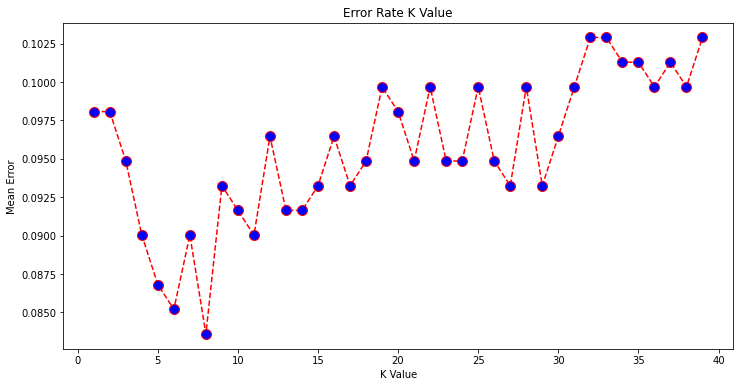

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### K-fold Cross-Validation

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
n_splits = 5 # decide how many folds
kf = KFold(n_splits=n_splits, shuffle=True)
X.shape

(3109, 8192)

In [20]:
# iteration of splitted data
i = 1
for train_set, test_set in kf.split(X=X):
    print("iteration ", i)
    print(train_set, "having: " , len(train_set))
    print(test_set, "having: " , len(test_set))
    print("----------------------------------------------------------------------")
    i+=1

iteration  1
[   1    2    3 ... 3106 3107 3108] having:  2487
[   0    8   10   17   21   22   23   25   48   49   54   57   59   63
   66   70   77   79   82   95  100  104  105  106  114  116  134  140
  148  151  155  156  159  169  170  184  185  197  203  204  209  210
  214  215  217  222  225  230  232  233  238  241  247  259  260  262
  268  272  284  292  309  310  313  316  317  319  325  329  330  336
  341  342  349  355  356  375  392  402  404  407  412  418  419  422
  426  435  439  441  442  444  446  448  451  452  457  467  468  471
  474  475  482  491  492  508  510  522  535  536  537  543  544  548
  550  551  552  554  557  565  568  571  574  577  578  597  600  608
  609  611  612  626  627  628  629  635  638  648  649  650  651  654
  658  660  662  666  670  684  689  694  706  714  715  724  727  728
  730  734  744  747  753  755  765  767  768  769  776  788  801  802
  808  814  820  823  827  831  835  838  839  857  858  862  863  869
  870  878  88

### Calculating accurracy for each fold

In [22]:
accuracies = []
from sklearn.metrics import mean_squared_error
for train_index, val_index in kf.split(X):
    X_train, y_train = X[train_index], y[train_index] 
    X_val, y_val = X[val_index], y[val_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    acc = np.sum(y_pred == y_val) / len(y_val) # calculate accurracy for each fold
    accuracies.append(acc) # add each accurracy into array
accuracies

[0.9421221864951769,
 0.9292604501607717,
 0.9228295819935691,
 0.9356913183279743,
 0.9307568438003221]

### Reporting Mean Accuracy

In [23]:
mean_acc = sum(accuracies) / len(accuracies) # calculate mean accuracy
print(mean_acc)
print(accuracies)

0.9321320761555627
[0.9421221864951769, 0.9292604501607717, 0.9228295819935691, 0.9356913183279743, 0.9307568438003221]


I used the cross-validation method with 5 folds and I got approximately the same result when I used Train/Test method. Mean accuracy is calculated by averaging the accuracy results for 5 folds.

In [24]:
print(accuracies)
print("Mean accurracy: ",mean_acc)

[0.9421221864951769, 0.9292604501607717, 0.9228295819935691, 0.9356913183279743, 0.9307568438003221]
Mean accurracy:  0.9321320761555627
